In [6]:
from keras.models import model_from_json
from keras.preprocessing import image, sequence
from matplotlib import pyplot as plt
import os
import numpy as np
import pickle
import cv2
import pickle

In [4]:
# load json and create model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model2_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# import the dictionary that maps our one hot encoding to actual labels
with open("img_list.p", "rb") as f:
    uniques = pickle.load(f)

In [9]:
# since i'have dumped that pickle in python 3 i am unable to load them as they use different encoding
# so i'm manually mapping them 
uniques = {0:'cat',1:'dog'}

In [10]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = im.reshape(1,im.shape[0],im.shape[1],3)
    return im

In [11]:
def getResult(im):
    img = preprocessing(im)
    res = loaded_model.predict(img)
    rest = res.argmax()
    rest = uniques[rest]
    return rest

In [19]:
datapath = './timages/'
images = os.listdir(datapath)
# print files
paths = []
for img in images:
    if img == '.DS_Store':
        continue
    if img.endswith(".jpg"):
            paths.append(datapath + img)     

In [21]:
print len(paths)

10


cat


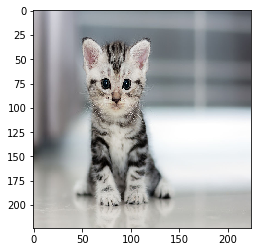

dog


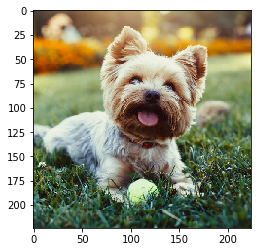

dog


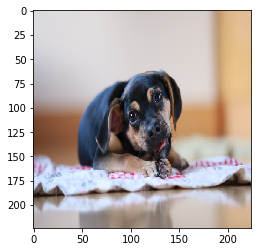

dog


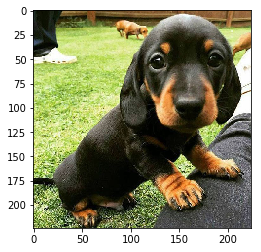

cat


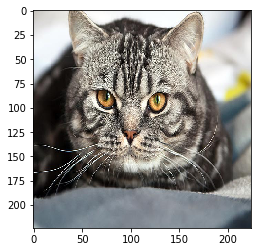

dog


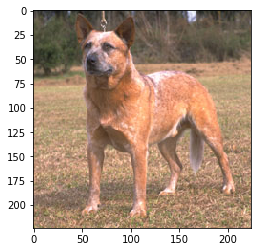

dog


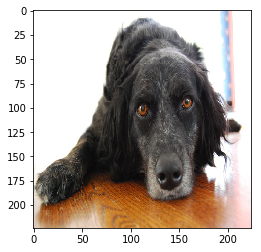

cat


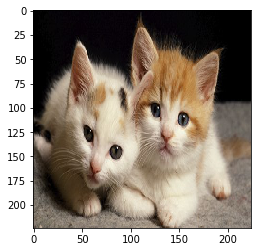

cat


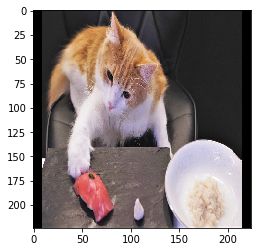

dog


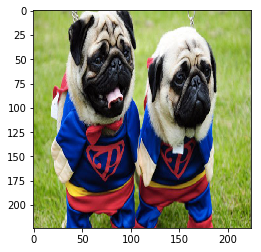

In [34]:
for path in paths:
    im = image.load_img(path, target_size=(224,224,3))
    print(getResult(path))
    plt.imshow(im,)
    plt.show()